I switched this to markdown. Nothing to run here.

I plan on converting all of this into a Python Class.

from ingestion.kivadataloader import KivaDataLoader

m = KivaDataLoader()

print(m.engine.table_names())



In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

from config import dbconfig


engine = create_engine(dbconfig.aws_connection_string)
table_names = engine.table_names()
print(table_names)

['partners', 'loan_dates', 'd_date', 'lenders', 'loans', 'loans_lenders', 'kiva_data_flat']


In [2]:
statement = """SELECT 
loans.loan_id
,loan_name
,CASE WHEN original_language = 'English'  THEN  1 ELSE 0 END AS language_english 
,char_length(description) as description_length
,funded_amount
,loan_amount
,loans.status as status_loans
,CASE WHEN image_id IS NULL THEN  0 ELSE 1 END as loan_image_provided
,CASE WHEN video_id IS NULL THEN  0 ELSE 1 END  as loan_video_provided
,activity_name
,sector_name
,char_length(loan_use) loan_use_length
,country_code
,country_name
,currency_policy
,currency_exchange_coverage_rate
,currency
,partner_id
,planned_expiration_time
,num_journal_entries
,num_bulk_entries
,CASE WHEN char_length(tags) > 0 THEN  1 ELSE 0 END tags_exist
,borrower_genders
,CASE WHEN borrower_pictured = 'FALSE' THEN 0 ELSE 1 END as atleast1_borrower_pictured
,repayment_interval
,distribution_model
,posted_time_actual
,disburse_to_posted_days
,posted_to_raised_days
,disbursed_to_raised_days
,partners.status as partner_status
,rating as partner_rating
,start_date as parner_start_date
,delinquency_rate as partner_delinquency_rate
,default_rate as partner_default_rate
,total_amount_raised as partner_total_amount_raised
,loans_posted as partner_loans_posted
,case when charges_fees_and_interest = 'TRUE' THEN 1 ELSE 0 END as partner_charges_fees_and_interest
,average_loan_size_percent_per_capita_income as partner_avg_loan_size_pct_per_capita_income
,loans_at_risk_rate as partner_loans_at_risk_rate
,currency_exchange_loss_rate as partner_loans_at_risk_rate
,CASE WHEN char_length(url) > 0 THEN  1 ELSE 0 END as partner_url_length
,portfolio_yield as partner_portfolio_yield
,profitability  as partner_profitability
 FROM loans
inner join partners on partners.id = loans.partner_id
inner join loan_dates on loans.loan_id = loan_dates.loan_id
where loans.status = 'funded' 
and posted_to_raised_days >= 0 and posted_to_raised_days <= 30
and borrower_genders <> 'None' 
"""

print (statement)
print ('The above statement takes about 5 minutes to run. Column totals will show when finished.')
#and posted_time_actual >= make_date(2016, 6 ,1) and posted_time_actual <= make_date(2017, 5 ,31)
cleanloans = pd.read_sql_query(statement, engine)

print (cleanloans.count())

SELECT 
loans.loan_id
,loan_name
,CASE WHEN original_language = 'English'  THEN  1 ELSE 0 END AS language_english 
,char_length(description) as description_length
,funded_amount
,loan_amount
,loans.status as status_loans
,CASE WHEN image_id IS NULL THEN  0 ELSE 1 END as loan_image_provided
,CASE WHEN video_id IS NULL THEN  0 ELSE 1 END  as loan_video_provided
,activity_name
,sector_name
,char_length(loan_use) loan_use_length
,country_code
,country_name
,currency_policy
,currency_exchange_coverage_rate
,currency
,partner_id
,planned_expiration_time
,num_journal_entries
,num_bulk_entries
,CASE WHEN char_length(tags) > 0 THEN  1 ELSE 0 END tags_exist
,borrower_genders
,CASE WHEN borrower_pictured = 'FALSE' THEN 0 ELSE 1 END as atleast1_borrower_pictured
,repayment_interval
,distribution_model
,posted_time_actual
,disburse_to_posted_days
,posted_to_raised_days
,disbursed_to_raised_days
,partners.status as partner_status
,rating as partner_rating
,start_date as parner_start_date
,delinquenc

# Add the borrowers code

In [3]:
cleanloans['num_borrowers_female'] = cleanloans['borrower_genders'].str.count('female')
cleanloans['num_borrowers_male'] = cleanloans['borrower_genders'].str.count('^male') + cleanloans['borrower_genders'].str.count('\, male')
cleanloans['num_borrowers'] = cleanloans['num_borrowers_female']+cleanloans['num_borrowers_male']

cleanloans['num_borrowers_female_pct'] = (cleanloans['num_borrowers_female']*1.00)/cleanloans['num_borrowers']

# One Hot the categories

In [4]:
import pandas as pd

cleanloans = pd.concat([cleanloans,pd.get_dummies(cleanloans['sector_name'], prefix='sector_name')],axis=1)
cleanloans.drop(['sector_name'],axis=1, inplace=True)

cleanloans = pd.concat([cleanloans,pd.get_dummies(cleanloans['distribution_model'], prefix='distribution_model')],axis=1)
cleanloans.drop(['distribution_model'],axis=1, inplace=True)

cleanloans = pd.concat([cleanloans,pd.get_dummies(cleanloans['currency'], prefix='currency')],axis=1)
cleanloans.drop(['currency'],axis=1, inplace=True)

cleanloans = pd.concat([cleanloans,pd.get_dummies(cleanloans['repayment_interval'], prefix='repayment_interval')],axis=1)
cleanloans.drop(['repayment_interval'],axis=1, inplace=True)

In [5]:
cleanloans

,loan_id,loan_name,language_english,description_length,funded_amount,loan_amount,status_loans,loan_image_provided,loan_video_provided,activity_name,...,currency_XCD,currency_XOF,currency_YER,currency_ZAR,currency_ZMK,currency_ZMW,currency_ZWD,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_monthly
0,1379923,Ambreen,1,1363.0,200.0,200.0,funded,1,0,Embroidery,...,0,0,0,0,0,0,0,0,0,1
1,305717,None,1,564.0,1200.0,1200.0,funded,1,0,Spare Parts,...,0,0,0,0,0,0,0,0,0,1
2,826788,Nooran,1,653.0,300.0,300.0,funded,1,0,Sewing,...,0,0,0,0,0,0,0,0,1,0
3,943811,Rosalinda,1,400.0,325.0,325.0,funded,1,0,Pigs,...,0,0,0,0,0,0,0,0,0,1
4,822895,DAVID,1,567.0,100.0,100.0,funded,1,0,Renewable Energy Products,...,0,0,0,0,0,0,0,0,0,1
5,30090,Pham Thi,0,1291.0,575.0,575.0,funded,1,0,Crafts,...,0,0,0,0,0,0,0,0,0,1
6,1219710,Angelo,1,559.0,1000.0,1000.0,funded,1,0,Higher education costs,...,0,0,0,0,0,0,0,0,0,1
7,380386,Silueta De Cristal Group,0,590.0,725.0,725.0,funded,1,0,Cobbler,...,0,0,0,0,0,0,0,0,0,1
8,39014,Epifania Francisca Noa Lozano's Group,1,1378.0,575.0,575.0,funded,1,0,Bakery,...,0,0,0,0,0,0,0,0,0,1
9,383263,Leona,1,432.0,250.0,250.0,funded,1,0,Food Production/Sales,...,0,0,0,0,0,0,0,0,1,0


In [6]:
import statsmodels.api as sm

X = cleanloans[cleanloans['num_borrowers_female_pct'] >= 0]['num_borrowers_female_pct']
y = cleanloans[cleanloans['num_borrowers_female_pct'] >= 0]["posted_to_raised_days"]

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     posted_to_raised_days   R-squared:                       0.378
Model:                               OLS   Adj. R-squared:                  0.378
Method:                    Least Squares   F-statistic:                 7.115e+05
Date:                   Sat, 03 Nov 2018   Prob (F-statistic):               0.00
Time:                           09:51:59   Log-Likelihood:            -4.2915e+06
No. Observations:                1170548   AIC:                         8.583e+06
Df Residuals:                    1170547   BIC:                         8.583e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
num_borrowers_female_pct     8.3408      0.010    843.506      0.000       8.321       8.360
==============================================================================
Omnibus:                   140139.678   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197005.588
Skew:                           0.999   Prob(JB):                         0.00
Kurtosis:                       3.222   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([2.24187e+05, 1.31000e+02, 4.49000e+02, 3.75000e+02, 1.05000e+03,
        1.66200e+03, 2.08500e+03, 6.61000e+02, 2.37600e+03, 5.14000e+02,
        7.22600e+03, 4.33200e+03, 1.75700e+03, 7.01100e+03, 2.08900e+03,
        7.03800e+03, 9.15100e+03, 5.78700e+03, 4.78900e+03, 8.87878e+05]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

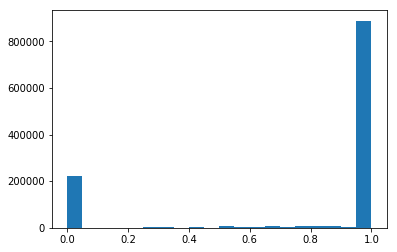

In [7]:
import matplotlib.pyplot as plt

plt.hist(cleanloans['num_borrowers_female_pct'], bins=20)

(array([112101.,  89940.,  87188.,  87738.,  87055.,  81757.,  69607.,
         59664.,  50919.,  43660.,  37514.,  32335.,  28872.,  26540.,
         23992.,  20591.,  18264.,  17368.,  16494.,  15949.,  15668.,
         15198.,  13933.,  13065.,  12856.,  12906.,  13581.,  14376.,
         15739.,  35678.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

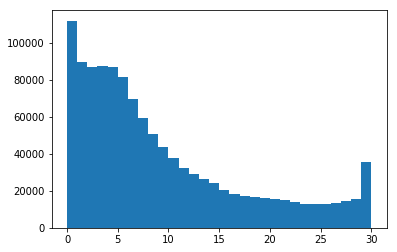

In [8]:
import matplotlib.pyplot as plt

plt.hist(cleanloans['posted_to_raised_days'], bins=30)